# Importing Dataset

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('F:/IPL_Data_analysis/IPL_Dataset.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150460 entries, 0 to 150459
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          150460 non-null  int64 
 1   inning            150460 non-null  int64 
 2   batting_team      150460 non-null  object
 3   bowling_team      150460 non-null  object
 4   over              150460 non-null  int64 
 5   ball              150460 non-null  int64 
 6   batsman           150460 non-null  object
 7   non_striker       150460 non-null  object
 8   bowler            150460 non-null  object
 9   is_super_over     150460 non-null  int64 
 10  wide_runs         150460 non-null  int64 
 11  bye_runs          150460 non-null  int64 
 12  legbye_runs       150460 non-null  int64 
 13  noball_runs       150460 non-null  int64 
 14  penalty_runs      150460 non-null  int64 
 15  batsman_runs      150460 non-null  int64 
 16  extra_runs        150460 non-null  int

# Null value Treatment

In [4]:
df.isna().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    143022
dismissal_kind      143022
fielder             145091
dtype: int64

<Axes: >

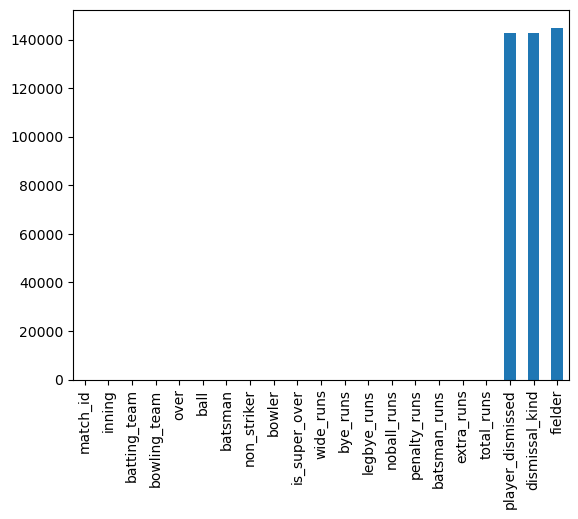

In [5]:
df.isna().sum().plot(kind='bar') #missing values by visualising

In [6]:
#three columns has the most null values
# fielder columns has the most highest null values
# dismissal_kind has the second highest null values
#player_dismissed has the second highest null values

<Axes: >

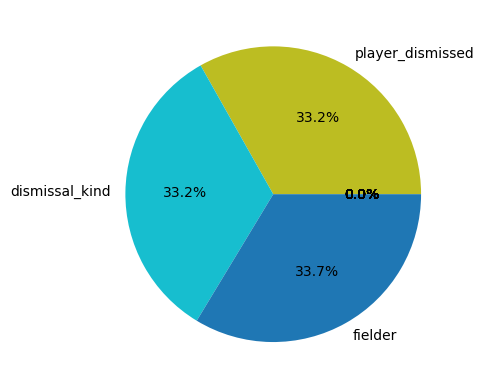

In [7]:
df.isna().sum().plot(kind='pie',autopct='%1.1f%%') #missing values by visualising

In [8]:
# fielder columns has 33.7% of null values
# dismissal_kind has 33.2% of null values
#player_dismissed has 33.2% of null values

In [9]:
for i in df.columns:
    if df[i].dtypes==object:
        df[i]=df[i].fillna(df[i].mode()[0])  #categorical columns filled by mode
    else:
        df[i]=df[i].fillna(df[i].mean())     #numerical columns filled by mean

In [10]:
df.isna().sum()

match_id            0
inning              0
batting_team        0
bowling_team        0
over                0
ball                0
batsman             0
non_striker         0
bowler              0
is_super_over       0
wide_runs           0
bye_runs            0
legbye_runs         0
noball_runs         0
penalty_runs        0
batsman_runs        0
extra_runs          0
total_runs          0
player_dismissed    0
dismissal_kind      0
fielder             0
dtype: int64

# Descriptive Statistics

In [11]:
for i in df.columns:
    if df[i].dtypes!=object:
        print(i)
        print()
        print(df[i].describe())
        print('************************************************************************')

match_id

count    150460.000000
mean        318.281317
std         182.955531
min           1.000000
25%         161.000000
50%         319.000000
75%         476.000000
max         636.000000
Name: match_id, dtype: float64
************************************************************************
inning

count    150460.000000
mean          1.482188
std           0.501768
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max           4.000000
Name: inning, dtype: float64
************************************************************************
over

count    150460.000000
mean         10.142649
std           5.674338
min           1.000000
25%           5.000000
50%          10.000000
75%          15.000000
max          20.000000
Name: over, dtype: float64
************************************************************************
ball

count    150460.000000
mean          3.616483
std           1.807698
min           1.000000
25%           2.0000

match_id


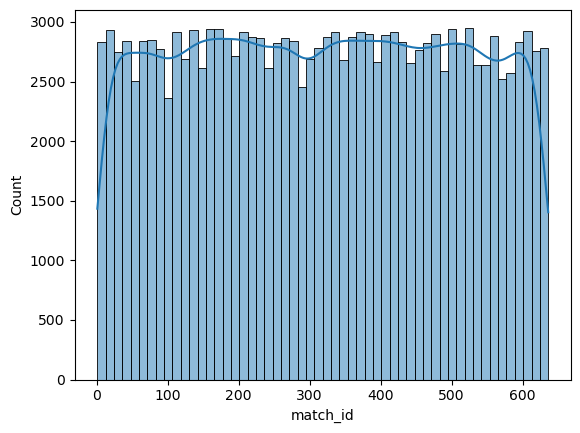

inning


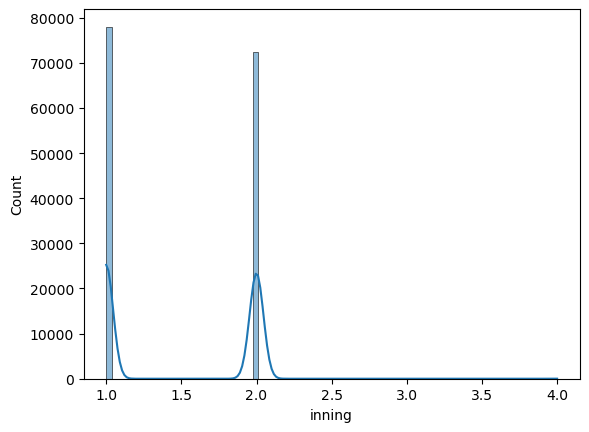

over


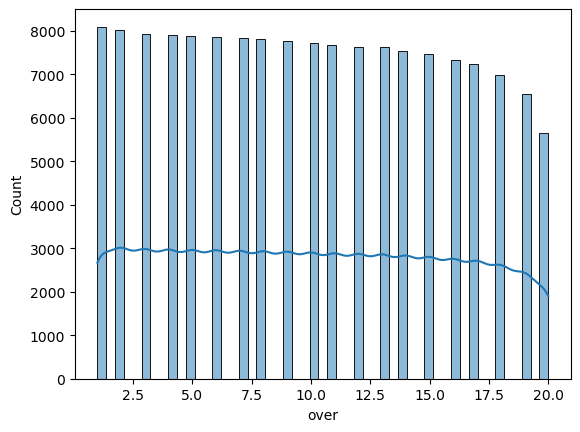

ball


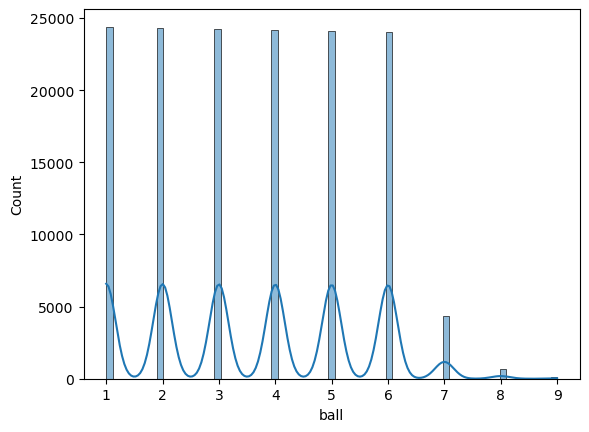

is_super_over


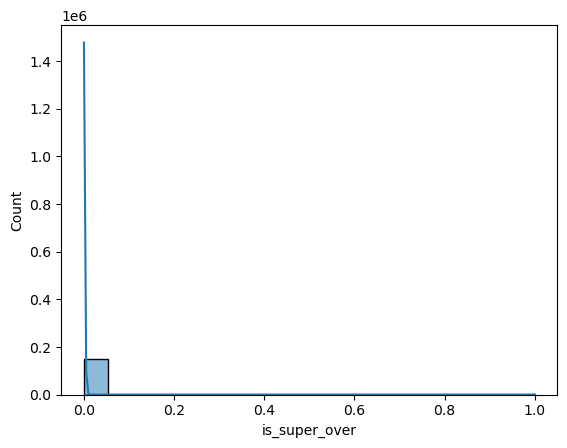

wide_runs


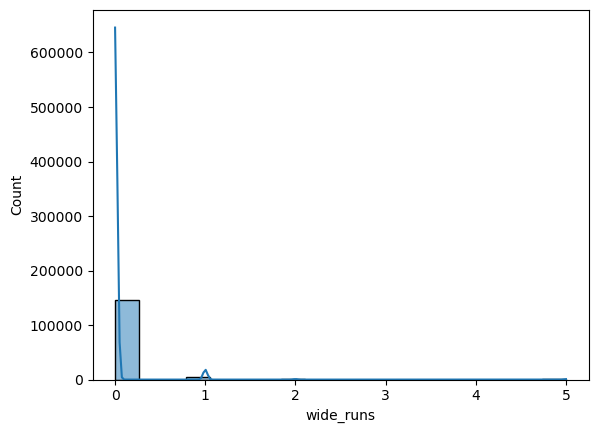

bye_runs


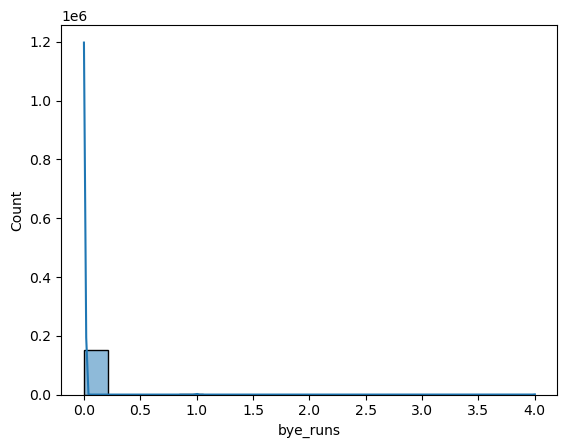

legbye_runs


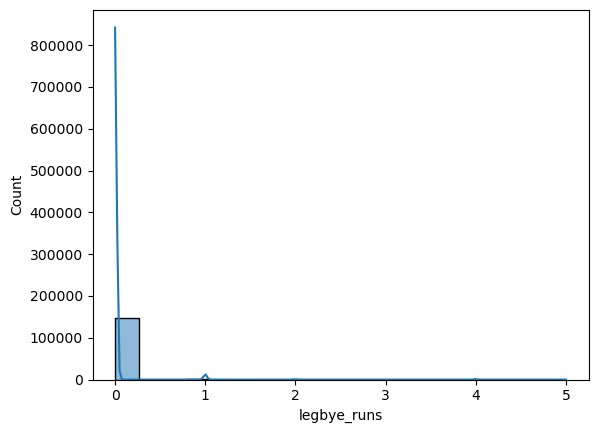

noball_runs


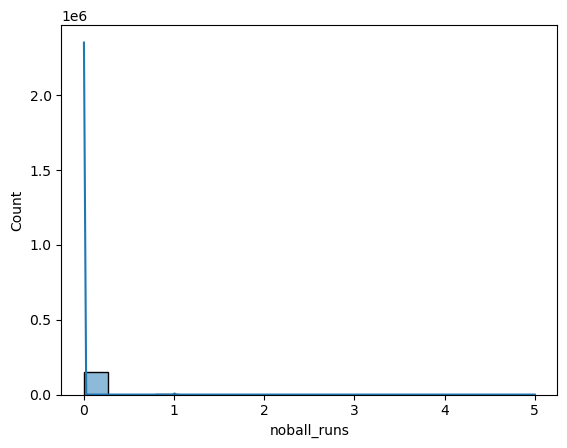

penalty_runs


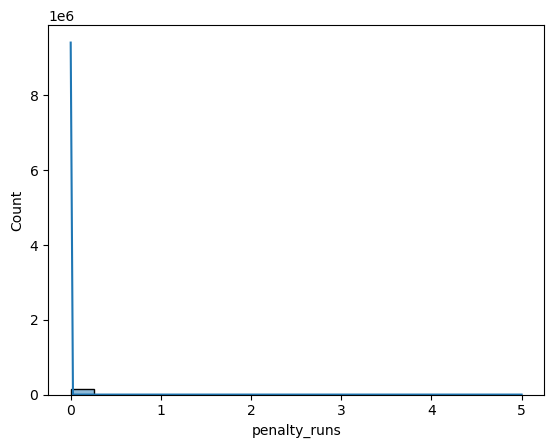

batsman_runs


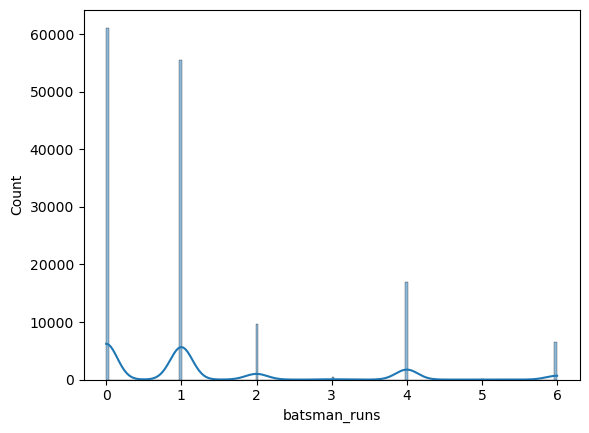

extra_runs


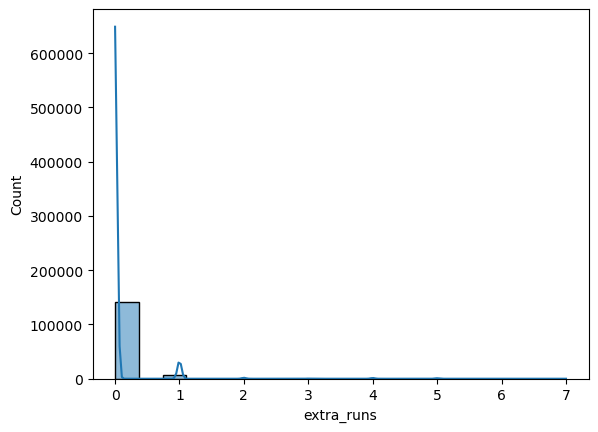

total_runs


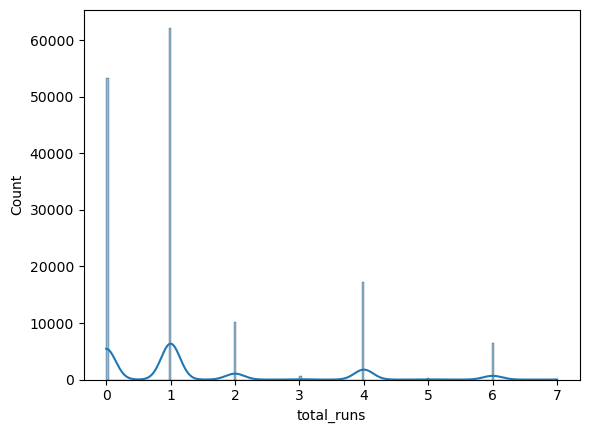

In [12]:
import seaborn as sns
from matplotlib.pyplot import show
for i in df.columns:
    if df[i].dtypes!=object:
        sns.histplot(data=df,x=i,kde=True)
        print(i)
        show()

In [13]:
cat=[]
con=[]
for i in df.columns:
    if df[i].dtypes==object:
        cat.append(i)
    else:
        con.append(i)

In [14]:
cat

['batting_team',
 'bowling_team',
 'batsman',
 'non_striker',
 'bowler',
 'player_dismissed',
 'dismissal_kind',
 'fielder']

In [15]:
con

['match_id',
 'inning',
 'over',
 'ball',
 'is_super_over',
 'wide_runs',
 'bye_runs',
 'legbye_runs',
 'noball_runs',
 'penalty_runs',
 'batsman_runs',
 'extra_runs',
 'total_runs']

# Correlation

In [16]:
Xcat=df[cat]
Xcon=df[con]

In [17]:
Xcon.corr() #correlation between all numerical columns

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
match_id,1.000000,0.001033,0.004365,-0.002464,-0.001220,-0.004850,-0.004662,-0.004324,-0.005849,-0.000972,0.006273,-0.008833,0.004366
inning,0.001033,1.000000,-0.051496,-0.003618,0.091904,0.001055,-0.000395,-0.001385,0.000389,0.003763,-0.005668,0.000132,-0.005680
over,0.004365,-0.051496,1.000000,-0.010953,-0.037394,-0.016226,0.013669,-0.005907,0.015717,-0.001055,0.089945,-0.007649,0.088896
ball,-0.002464,-0.003618,-0.010953,1.000000,-0.001258,-0.005931,0.006755,-0.004449,0.002350,0.000774,0.008944,-0.004176,0.008086
is_super_over,-0.001220,0.091904,-0.037394,-0.001258,1.000000,-0.001155,0.001516,0.001717,0.014389,-0.000085,0.011497,0.003613,0.012377
wide_runs,-0.004850,0.001055,-0.016226,-0.005931,-0.001155,1.000000,-0.006230,-0.016186,-0.008703,0.013633,-0.111690,0.723726,0.047354
bye_runs,-0.004662,-0.000395,0.013669,0.006755,0.001516,-0.006230,1.000000,-0.004751,-0.002555,-0.000156,-0.032785,0.318850,0.037402
legbye_runs,-0.004324,-0.001385,-0.005907,-0.004449,0.001717,-0.016186,-0.004751,1.000000,-0.006637,-0.000405,-0.085177,0.557403,0.037322
noball_runs,-0.005849,0.000389,0.015717,0.002350,0.014389,-0.008703,-0.002555,-0.006637,1.000000,-0.000218,0.000272,0.196724,0.043722
penalty_runs,-0.000972,0.003763,-0.001055,0.000774,-0.000085,0.013633,-0.000156,-0.000405,-0.000218,1.000000,-0.002795,0.061842,0.010843


<Axes: >

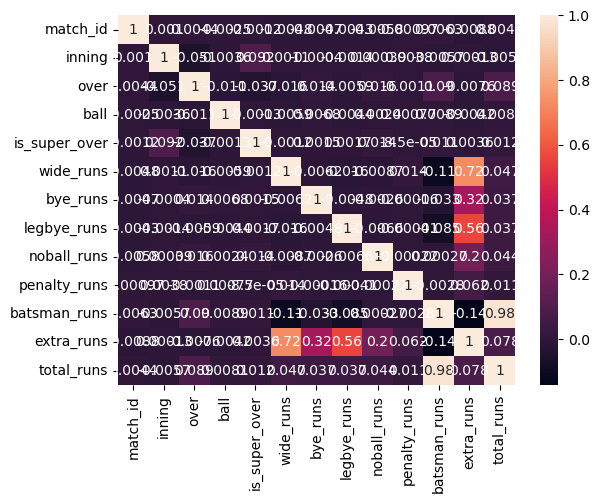

In [18]:
sns.heatmap(Xcon.corr(),annot=True)

<Axes: >

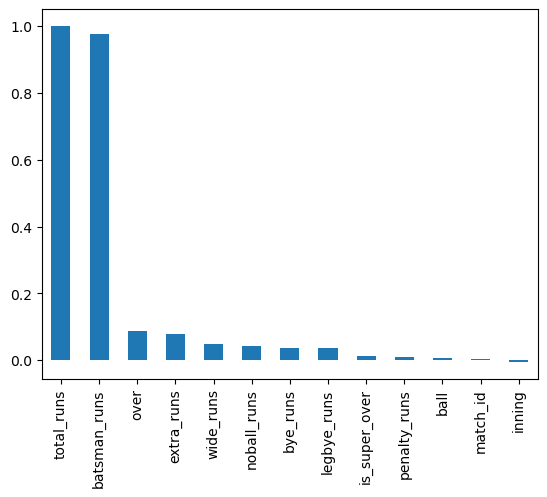

In [19]:
Xcon.corr()['total_runs'].sort_values(ascending=False).plot(kind='bar')

# PairPlot

C:\Users\addiction computers\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


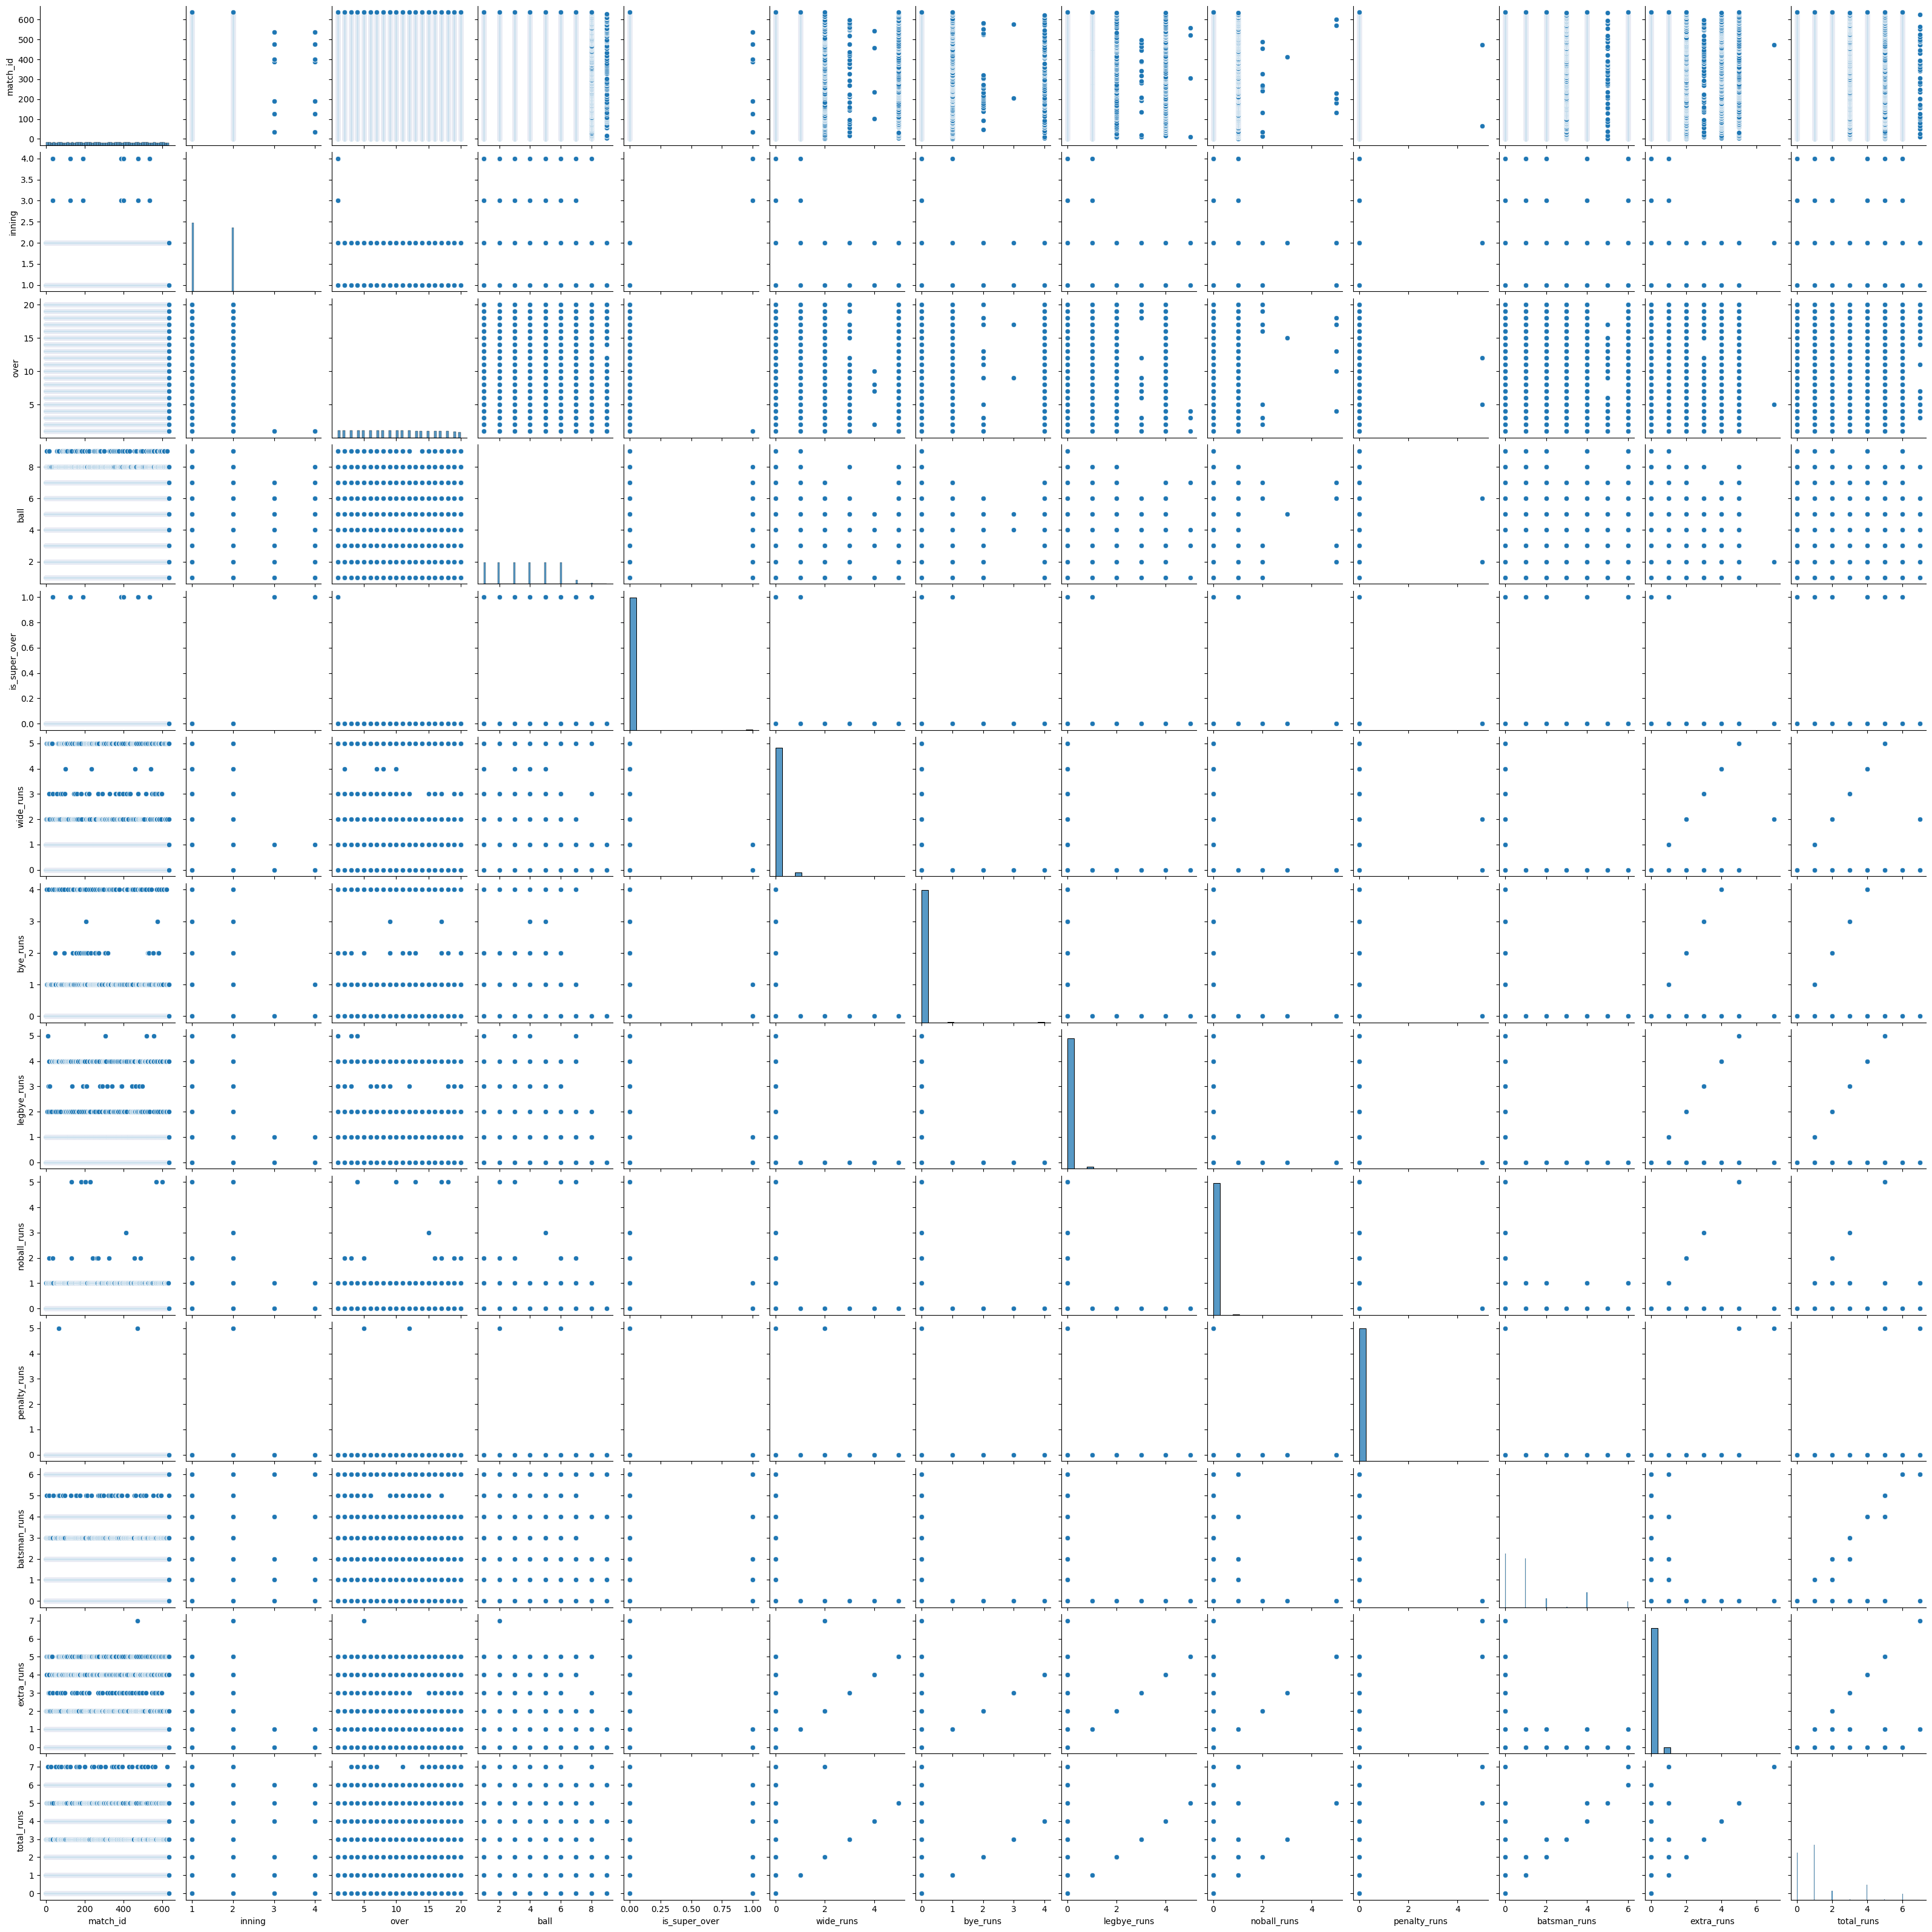

In [20]:
sns.pairplot(data=Xcon)

# Advance Analysis


1. What is the total number of runs scored by each 
batting team?

In [21]:
runs=df.groupby('batting_team')['total_runs'].sum()

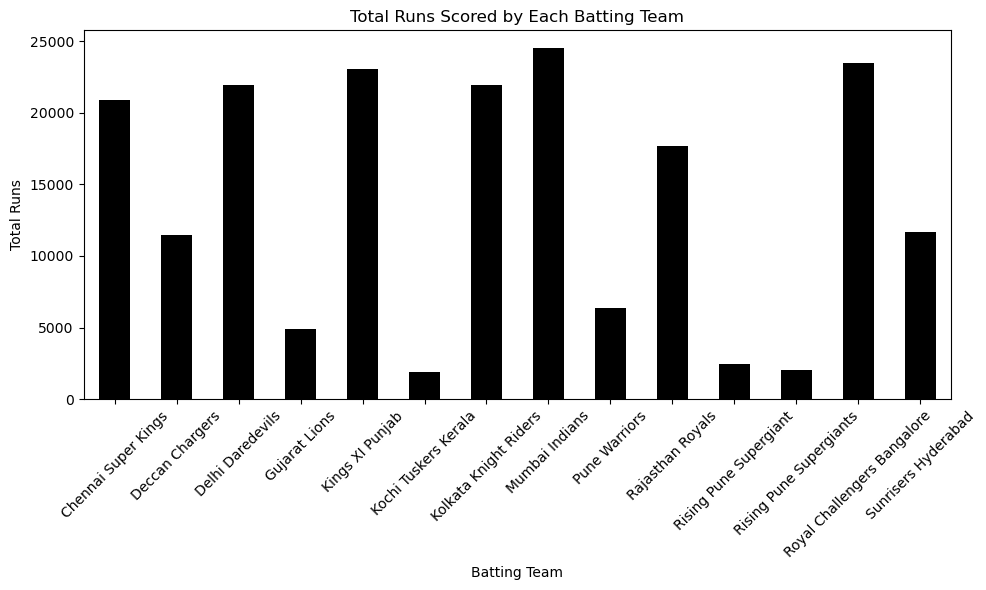

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
runs.plot(kind='bar', color='Black')
plt.title('Total Runs Scored by Each Batting Team')
plt.xlabel('Batting Team')
plt.ylabel('Total Runs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


2. How many wides have been bowled by each bowling 
team?


In [23]:
wides=df.groupby('bowling_team')['wide_runs'].sum()
print(wides)

bowling_team
Chennai Super Kings            526
Deccan Chargers                328
Delhi Daredevils               614
Gujarat Lions                  107
Kings XI Punjab                668
Kochi Tuskers Kerala            56
Kolkata Knight Riders          658
Mumbai Indians                 786
Pune Warriors                  174
Rajasthan Royals               586
Rising Pune Supergiant          69
Rising Pune Supergiants         77
Royal Challengers Bangalore    725
Sunrisers Hyderabad            268
Name: wide_runs, dtype: int64


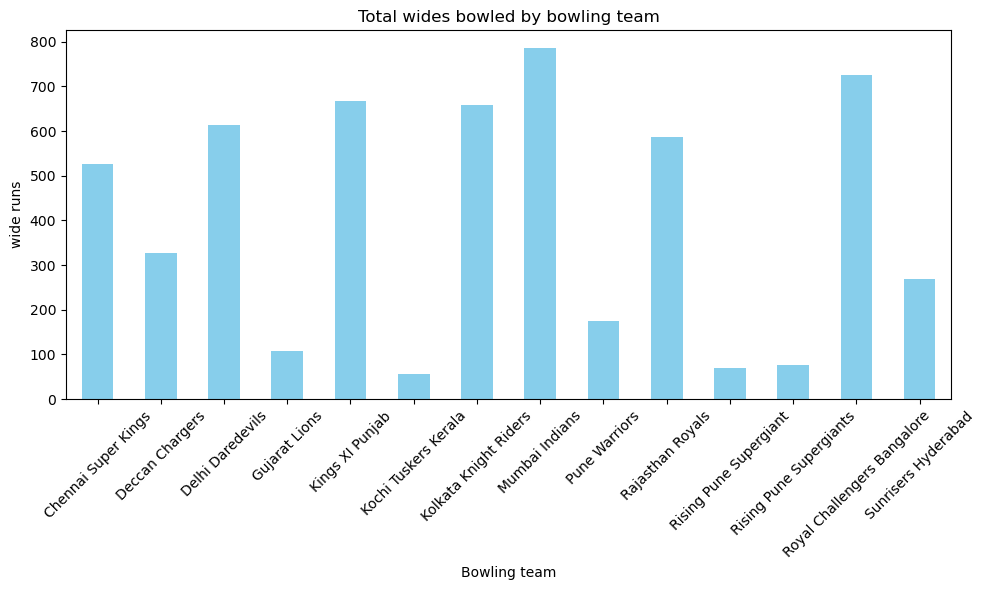

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
wides.plot(kind='bar', color='skyblue')
plt.title('Total wides bowled by bowling team')
plt.xlabel('Bowling team')
plt.ylabel('wide runs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

3. What is the average number of runs scored per 
inning by each team?

In [25]:

average_runs_per_inning = df.groupby('batting_team')['total_runs'].mean()
print("Average runs scored per inning by each team:")
print(average_runs_per_inning)


Average runs scored per inning by each team:
batting_team
Chennai Super Kings            1.326584
Deccan Chargers                1.268873
Delhi Daredevils               1.277451
Gujarat Lions                  1.363432
Kings XI Punjab                1.311129
Kochi Tuskers Kerala           1.201643
Kolkata Knight Riders          1.274885
Mumbai Indians                 1.294462
Pune Warriors                  1.168106
Rajasthan Royals               1.272316
Rising Pune Supergiant         1.300000
Rising Pune Supergiants        1.305696
Royal Challengers Bangalore    1.325716
Sunrisers Hyderabad            1.286377
Name: total_runs, dtype: float64


4. Which batsman has scored the highest number of 
runs?


In [26]:
df.groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False).head(1)

batsman
SK Raina    4548
Name: batsman_runs, dtype: int64

5. How many dismissals have occurred of each 
dismissal kind?

In [27]:
df['dismissal_kind'].value_counts()

dismissal_kind
caught                   147395
bowled                     1382
run out                     755
lbw                         455
stumped                     243
caught and bowled           211
retired hurt                  9
hit wicket                    9
obstructing the field         1
Name: count, dtype: int64

6. What is the total runs scored by each over?


In [28]:
overs=df.groupby('over')['total_runs'].sum()
print(overs)

over
1      7733
2      8993
3      9852
4     10207
5     10227
6     10397
7      8413
8      8966
9      9247
10     9047
11     9456
12     9694
13     9713
14     9900
15    10240
16    10397
17    10817
18    10899
19    10469
20     9647
Name: total_runs, dtype: int64


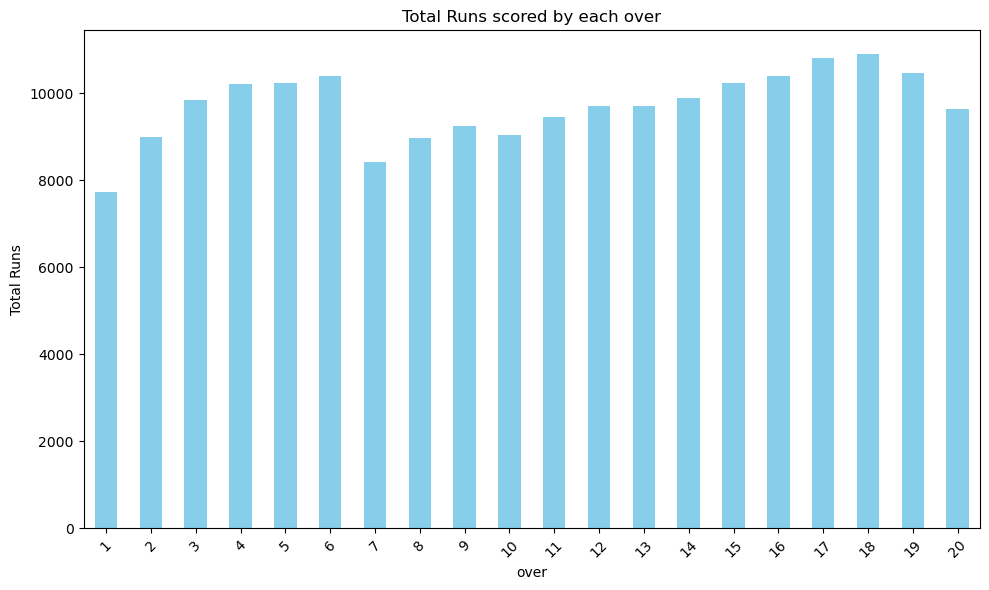

In [29]:
plt.figure(figsize=(10, 6))
overs.plot(kind='bar', color='skyblue')
plt.title('Total Runs scored by each over')
plt.xlabel('over')
plt.ylabel('Total Runs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

7. Which bowler has taken the most wickets?

In [30]:
df['bowler'].value_counts().head(1)

bowler
Harbhajan Singh    2989
Name: count, dtype: int64

8. How many super overs have been played in total?


In [31]:
super_overs_played = df[df['is_super_over'] == 1].shape[0]
print(super_overs_played)

81


9. What is the average number of extras (wide runs, 
bye runs, legbye runs, noball runs, penalty runs) 
conceded per inning by each bowling team?


In [32]:
df['total_extras'] = df['wide_runs'] + df['bye_runs'] + df['legbye_runs'] + df['noball_runs'] + df['penalty_runs']
extras_inning = df.groupby(['bowling_team', 'inning'])['total_extras'].sum()
average_inning = extras_inning.groupby('bowling_team').mean()
print(average_inning)

bowling_team
Chennai Super Kings            334.000000
Deccan Chargers                329.500000
Delhi Daredevils               395.666667
Gujarat Lions                   62.666667
Kings XI Punjab                307.500000
Kochi Tuskers Kerala            55.000000
Kolkata Knight Riders          401.333333
Mumbai Indians                 465.666667
Pune Warriors                  167.500000
Rajasthan Royals               352.666667
Rising Pune Supergiant          55.500000
Rising Pune Supergiants         54.000000
Royal Challengers Bangalore    327.250000
Sunrisers Hyderabad            162.333333
Name: total_extras, dtype: float64


10. How many runs have been scored by each 
batsman-bowler pair?

In [34]:
join_runs = df.groupby(['batsman', 'bowler'])['batsman_runs'].sum()
print("Runs scored by each batsman-bowler pair:")
print(join_runs)


Runs scored by each batsman-bowler pair:
batsman         bowler         
A Ashish Reddy  A Nehra             7
                AB Dinda            9
                AD Mathews         25
                AD Russell          4
                Anureet Singh       2
                                   ..
Z Khan          SR Watson           3
                Shakib Al Hasan     3
                Sohail Tanvir       3
                VRV Singh           0
                YK Pathan           1
Name: batsman_runs, Length: 17151, dtype: int64


11. What is the most common dismissal kind?

In [40]:
common_dismissal_kind = df['dismissal_kind'].value_counts().sort_values(ascending=False).head(1)
print(common_dismissal_kind)

dismissal_kind
caught    147395
Name: count, dtype: int64


12. How many matches have been played by each 
batting team?

In [41]:
matches_played_by_team = df['batting_team'].value_counts()
print("Number of matches played by each batting team:")
print(matches_played_by_team)


Number of matches played by each batting team:
batting_team
Mumbai Indians                 18943
Royal Challengers Bangalore    17678
Kings XI Punjab                17594
Kolkata Knight Riders          17229
Delhi Daredevils               17185
Chennai Super Kings            15754
Rajasthan Royals               13914
Sunrisers Hyderabad             9058
Deccan Chargers                 9034
Pune Warriors                   5443
Gujarat Lions                   3566
Rising Pune Supergiant          1900
Kochi Tuskers Kerala            1582
Rising Pune Supergiants         1580
Name: count, dtype: int64


13. What is the average number of runs scored in each 
over?

In [42]:
average_runs_per_over = df.groupby('over')['total_runs'].mean()
print("Average number of runs scored in each over:")
print(average_runs_per_over)


Average number of runs scored in each over:
over
1     0.955635
2     1.121601
3     1.242057
4     1.291698
5     1.298832
6     1.321933
7     1.074869
8     1.149635
9     1.189325
10    1.170981
11    1.233177
12    1.269347
13    1.275509
14    1.313694
15    1.373206
16    1.418031
17    1.495300
18    1.561685
19    1.600031
20    1.707736
Name: total_runs, dtype: float64


14. Which fielder has been involved in the most 
dismissals?

In [43]:
most_common_fielder = df['fielder'].value_counts().sort_values(ascending=False).head(1)

print("Fielder involved in the most dismissals:", most_common_fielder)

Fielder involved in the most dismissals: fielder
KD Karthik    145218
Name: count, dtype: int64


15. How does the number of runs scored vary with the 
over number?

In [46]:
df.groupby('over')['total_runs'].sum()

over
1      7733
2      8993
3      9852
4     10207
5     10227
6     10397
7      8413
8      8966
9      9247
10     9047
11     9456
12     9694
13     9713
14     9900
15    10240
16    10397
17    10817
18    10899
19    10469
20     9647
Name: total_runs, dtype: int64

16. how is the relationship between the number of 
runs scored and the number of extras conceded?

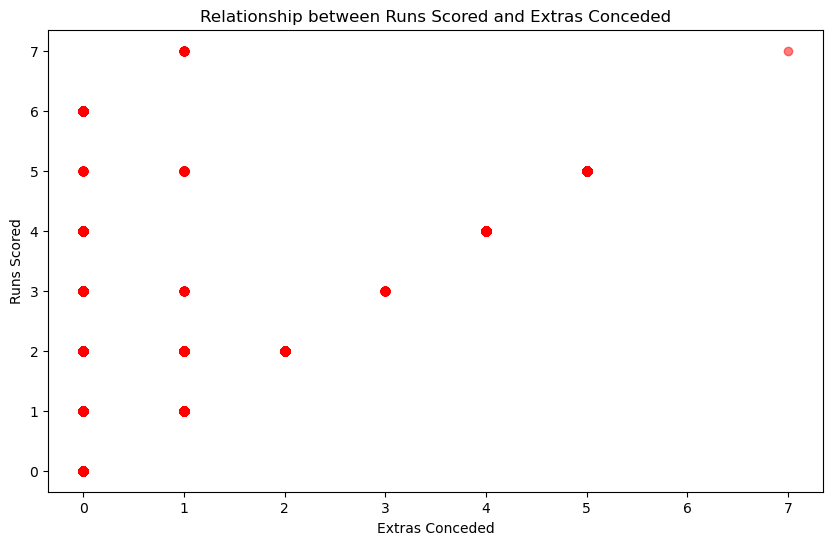

In [60]:
import matplotlib.pyplot as plt

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['extra_runs'], df['total_runs'], alpha=0.5,color='Red')
plt.title('Relationship between Runs Scored and Extras Conceded')
plt.xlabel('Extras Conceded')
plt.ylabel('Runs Scored')
plt.grid(False)
plt.show()


17. Are there any notable trends in the distribution of 
runs scored by batting teams across innings?



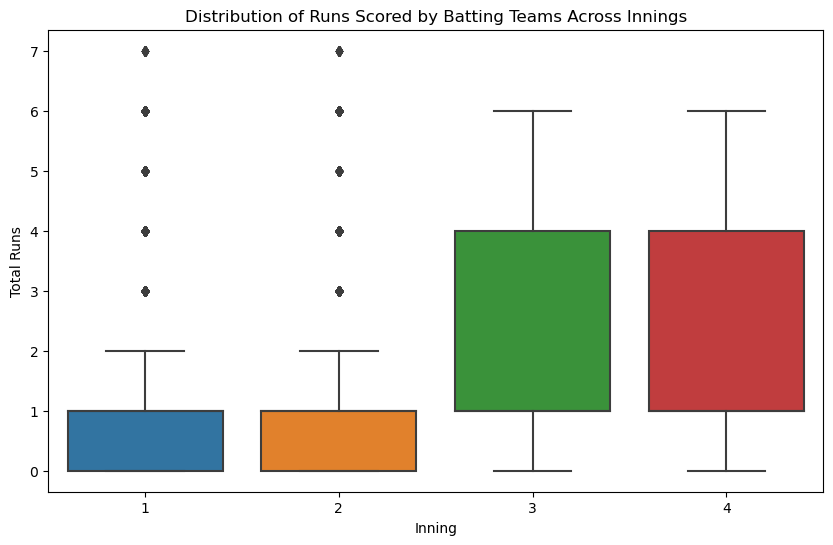

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='inning', y='total_runs', data=df)
plt.title('Distribution of Runs Scored by Batting Teams Across Innings')
plt.xlabel('Inning')
plt.ylabel('Total Runs')
plt.show()


18. Which batting team has the highest average runs 
per match?

In [62]:
average_runs_per_match = df.groupby('batting_team')['total_runs'].mean()

# Find the batting team with the highest average runs per match

highest_average_runs_team = average_runs_per_match.sort_values(ascending=False).head(1)
print("Batting team with the highest average runs per match:", highest_average_runs_team)


Batting team with the highest average runs per match: batting_team
Gujarat Lions    1.363432
Name: total_runs, dtype: float64


19. What is the total runs scored by each batsman?


In [63]:
# Group the data by 'batsman' and calculate the sum of 'batsman_runs' for each batsman

total_runs_by_batsman = df.groupby('batsman')['batsman_runs'].sum()
print("Total runs scored by each batsman:")
print(total_runs_by_batsman)


Total runs scored by each batsman:
batsman
A Ashish Reddy     280
A Chandila           4
A Chopra            53
A Choudhary         25
A Flintoff          62
                  ... 
YV Takawale        192
Yashpal Singh       47
Younis Khan          3
Yuvraj Singh      2591
Z Khan             117
Name: batsman_runs, Length: 461, dtype: int64


20. How does the average number of runs scored per 
inning vary across different bowling teams?

In [64]:
# Calculate the total runs conceded by each bowling team
total_runs_by_team = df.groupby('bowling_team')['total_runs'].sum()

# Calculate the average runs scored per inning for each bowling team
average_runs_per_inning_by_team = total_runs_by_team.mean()

print("Average number of runs scored per inning across different bowling teams:")
print(average_runs_per_inning_by_team)


Average number of runs scored per inning across different bowling teams:
13879.57142857143


21. how is the relationship between the number of wides and the number of no balls bowled?

                                                 

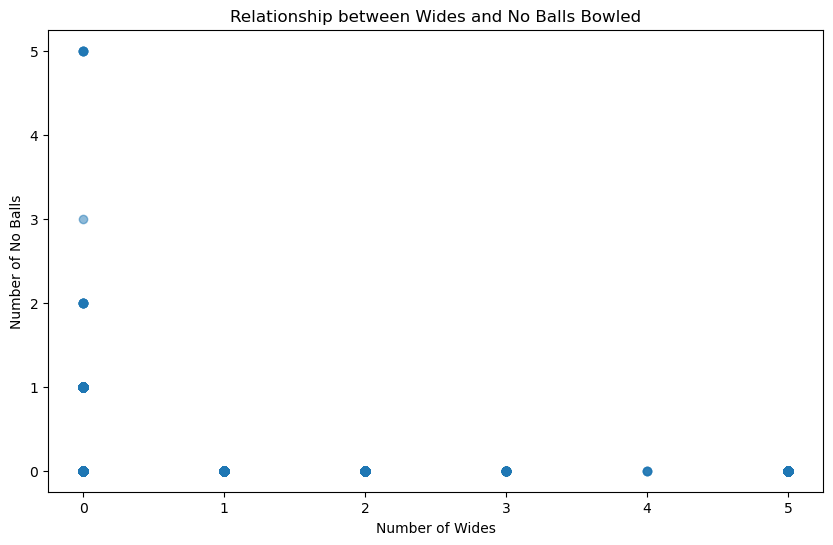

In [66]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df['wide_runs'], df['noball_runs'], alpha=0.5)
plt.title('Relationship between Wides and No Balls Bowled')
plt.xlabel('Number of Wides')
plt.ylabel('Number of No Balls')
plt.grid(False)
plt.show()


22. Which batting team has the highest number of 
centuries?

In [67]:
# Filter the DataFrame for rows where centuries were scored (batsman_runs >= 100)
century_matches = df[df['batsman_runs'] >= 100]

# Group the filtered DataFrame by 'batting_team' and count the occurrences of centuries scored by each team
centuries_by_team = century_matches['batting_team'].value_counts()

# Find the batting team with the highest number of centuries
highest_centuries_team = centuries_by_team.sort_values(ascending=False).head(1)

print("Batting team with the highest number of centuries:", highest_centuries_team)


Batting team with the highest number of centuries: Series([], Name: count, dtype: int64)


23. How does the number of wides vary with the over 
number

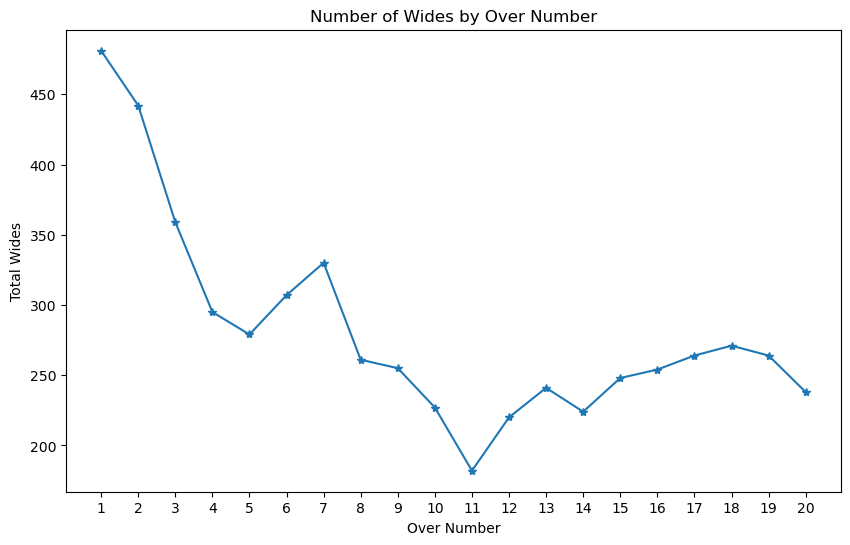

In [73]:
import matplotlib.pyplot as plt

# Group the data by 'over' and calculate the sum of 'wide_runs' for each over
wides_by_over = df.groupby('over')['wide_runs'].sum()

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(wides_by_over.index, wides_by_over.values, marker='*', linestyle='-')
plt.title('Number of Wides by Over Number')
plt.xlabel('Over Number')
plt.ylabel('Total Wides')
plt.xticks(range(1, max(df['over']) + 1))  # Set x-axis ticks to over numbers
plt.grid(False)
plt.show()


24. What is the average number of runs scored per 
inning in matches with a super over?

In [74]:
# Step 1: Filter the DataFrame for matches with a super over
matches_with_super_over = df[df['is_super_over'] == 1]

# Step 2: Calculate the total runs scored in each match
total_runs_per_match = matches_with_super_over.groupby('match_id')['total_runs'].sum()

# Step 3: Find the total number of innings played in matches with a super over
total_innings_played = len(matches_with_super_over)

# Step 4: Calculate the average runs scored per inning
average_runs_per_inning = total_runs_per_match.sum() / total_innings_played

print("Average number of runs scored per inning in matches with a super over:", average_runs_per_inning)


Average number of runs scored per inning in matches with a super over: 2.1358024691358026


25. How does the number of extras vary with the over 
number?

In [76]:
extras_by_over = df.groupby('over')['extra_runs'].sum()
print(extras_by_over)

over
1     768
2     730
3     629
4     562
5     495
6     582
7     553
8     465
9     459
10    437
11    379
12    395
13    451
14    426
15    425
16    458
17    548
18    531
19    527
20    565
Name: extra_runs, dtype: int64


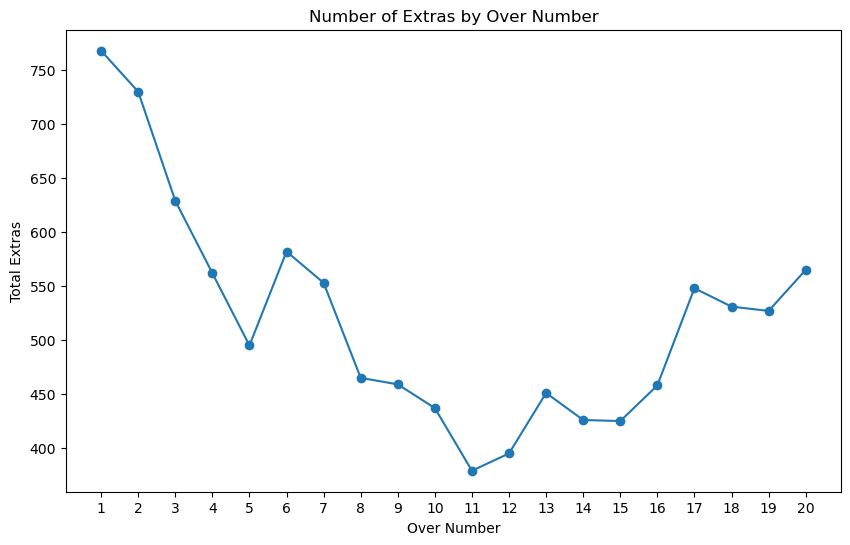

In [77]:
# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(extras_by_over.index, extras_by_over.values, marker='o', linestyle='-')
plt.title('Number of Extras by Over Number')
plt.xlabel('Over Number')
plt.ylabel('Total Extras')
plt.xticks(range(1, max(df['over']) + 1))  # Set x-axis ticks to over numbers
plt.grid(False)
plt.show()


26. Which bowler has the highest economy rate?


In [78]:
# Calculate the total runs conceded by each bowler
total_runs_by_bowler = df.groupby('bowler')['total_runs'].sum()

# Calculate the total overs bowled by each bowler
total_overs_by_bowler = df.groupby('bowler')['over'].nunique()

# Calculate the economy rate for each bowler (runs conceded per over)
economy_rate_by_bowler = total_runs_by_bowler / total_overs_by_bowler

# Find the bowler with the lowest economy rate (best economy rate)
best_economy_bowler = economy_rate_by_bowler.sort_values(ascending=False).head(1)

print("Bowler with the highest economy rate:", best_economy_bowler)


Bowler with the highest economy rate: bowler
PP Chawla    174.473684
dtype: float64


27. How does the number of dismissals vary across 
different dismissal kinds?

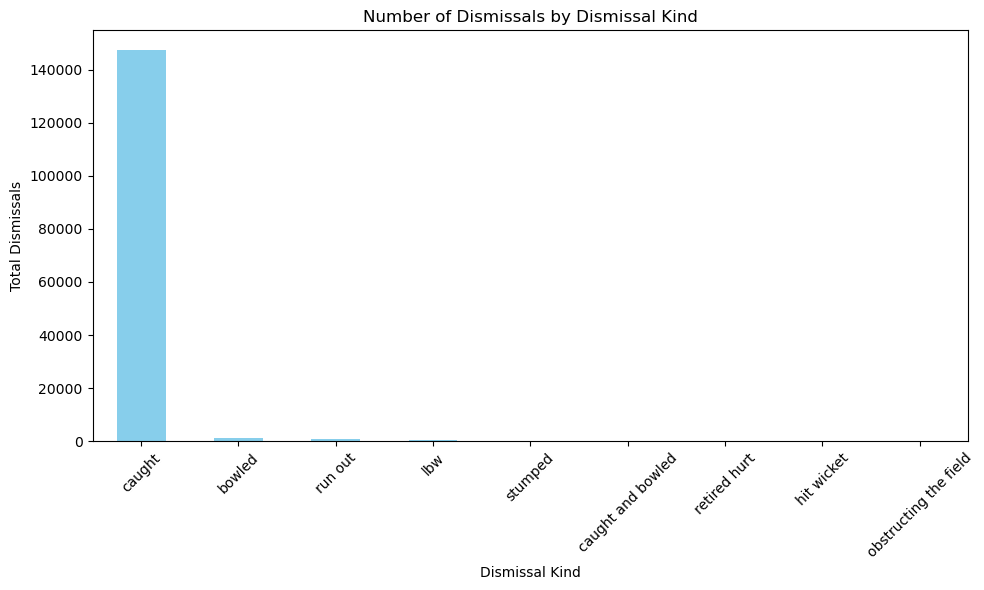

In [81]:
import matplotlib.pyplot as plt

# Group the data by 'dismissal_kind' and count the occurrences of each dismissal kind
dismissals_by_kind = df['dismissal_kind'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
dismissals_by_kind.plot(kind='bar', color='skyblue')
plt.title('Number of Dismissals by Dismissal Kind')
plt.xlabel('Dismissal Kind')
plt.ylabel('Total Dismissals')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


28. What is the distribution of runs scored by each 
batting team in super overs?

In [84]:
super_over_matches = df[df['is_super_over'] == 1]
runs_scored_per_super_over = super_over_matches.groupby(['batting_team', 'match_id'])['total_runs'].sum()
print(runs_scored_per_super_over)


batting_team                 match_id
Chennai Super Kings          190          9
Delhi Daredevils             401         11
Gujarat Lions                34           6
Kings XI Punjab              190         10
                             536         15
Kolkata Knight Riders        126         15
                             476         11
Mumbai Indians               34          11
Rajasthan Royals             126         18
                             476         11
                             536          6
Royal Challengers Bangalore  388         15
                             401         15
Sunrisers Hyderabad          388         20
Name: total_runs, dtype: int64


<Figure size 1000x600 with 0 Axes>

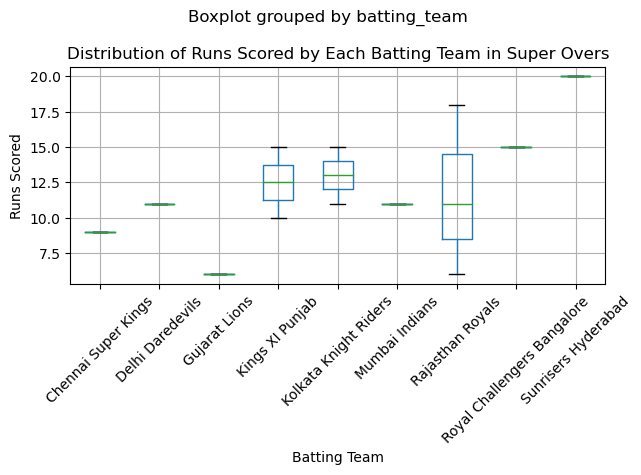

In [86]:
plt.figure(figsize=(10, 6))
runs_scored_per_super_over.reset_index().boxplot(column='total_runs', by='batting_team', rot=45)
plt.title('Distribution of Runs Scored by Each Batting Team in Super Overs')
plt.xlabel('Batting Team')
plt.ylabel('Runs Scored')
plt.tight_layout()
plt.show()
